In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

2024-04-15 21:19:15.944425: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-15 21:19:15.970981: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-15 21:19:18.402310: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-15 21:19:22.575599: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-15 21:19:27.117331: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [50]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [35]:
len(x_test)

10000

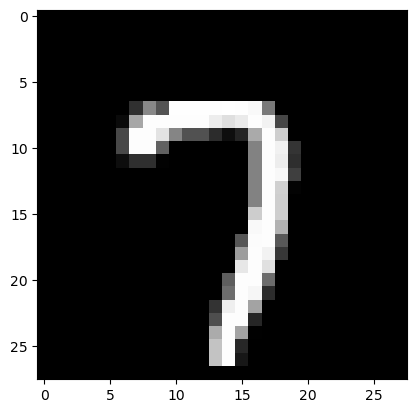

In [36]:
%matplotlib inline
plt.imshow(x_train[25639],cmap='gray')

In [37]:
y_train[:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

In [64]:
x_test[0].shape

(28, 28)

In [102]:
x_train = x_train/255
x_test = x_test/255

In [52]:
x_train_flat = x_train.reshape(len(x_train),28*28)
x_test_flat = x_test.reshape(len(x_test),28*28)

In [69]:
x_train_flat.shape

(60000, 784)

In [53]:
model = keras.Sequential({
    keras.layers.Dense(10, input_shape=(28*28,),activation='sigmoid')
})

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flat,y_train,epochs=6)

/home/rajyavardhan/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step - accuracy: 0.8082 - loss: 0.7318
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - accuracy: 0.9180 - loss: 0.3034
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step - accuracy: 0.9214 - loss: 0.2858
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step - accuracy: 0.9248 - loss: 0.2685
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.9266 - loss: 0.2607
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step - accuracy: 0.9273 - loss: 0.2627


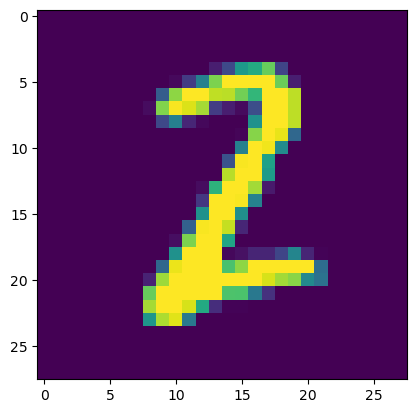

In [56]:
dat = x_test[256]
plt.imshow(dat)

In [92]:
y_predict = model.predict(x_test_flat)
y_pred_get = y_predict[256]
np.argmax(y_pred_get)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


2

In [89]:
y_label = [np.argmax(i) for i in y_predict]
y_label[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [93]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [94]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   7,    8,  925,   18,    6,    5,   11,    9,   38,    5],
       [   3,    0,   19,  918,    0,   28,    2,   10,   21,    9],
       [   2,    2,    6,    2,  893,    0,   11,    5,    8,   53],
       [   9,    3,    3,   31,    5,  790,   13,    6,   25,    7],
       [  11,    3,    9,    1,    7,   18,  905,    2,    2,    0],
       [   1,    5,   23,    6,    3,    2,    0,  952,    2,   34],
       [   7,    9,    7,   20,    9,   30,    9,   11,  865,    7],
       [  11,    7,    1,    8,   12,    8,    0,   19,    6,  937]],
      dtype=int32)>

<AxesSubplot: >

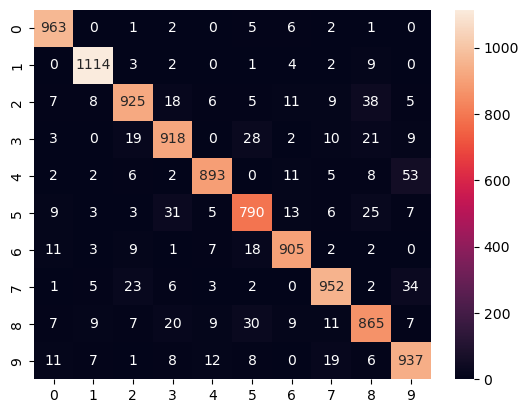

In [95]:
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')

In [88]:
model = keras.Sequential({
    keras.layers.Dense(80, input_shape=(28*28,),activation='relu'), # hidden
    keras.layers.Dense(10, activation='sigmoid')
})

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flat,y_train,epochs=6)

/home/rajyavardhan/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8640 - loss: 0.4799
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9562 - loss: 0.1490
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9708 - loss: 0.0993
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9782 - loss: 0.0735
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9819 - loss: 0.0585
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9875 - loss: 0.0451


In [96]:
y_predict = model.predict(x_test_flat)
y_pred_get = y_predict[256]
np.argmax(y_pred_get)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


2

In [97]:
y_label = [np.argmax(i) for i in y_predict]
y_label[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [98]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    2,    0,    1,    1,    0,    2,    2],
       [   0, 1119,    5,    0,    0,    1,    2,    1,    7,    0],
       [   8,    1,  999,    3,    4,    0,    3,    7,    7,    0],
       [   1,    0,    4,  988,    1,    3,    0,    5,    5,    3],
       [   3,    0,    2,    1,  948,    0,    5,    7,    2,   14],
       [   3,    0,    0,   15,    0,  857,    7,    1,    8,    1],
       [   8,    2,    0,    1,    2,    3,  939,    2,    1,    0],
       [   2,    3,    7,    4,    0,    0,    0, 1003,    4,    5],
       [   6,    1,    2,    7,    0,    6,    1,    4,  943,    4],
       [   4,    3,    0,    6,    6,    1,    1,    6,    7,  975]],
      dtype=int32)>

<AxesSubplot: >

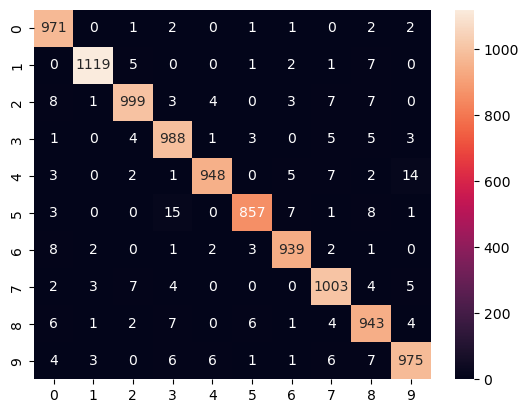

In [99]:
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')

In [104]:
model = keras.Sequential({
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(80, activation='relu'), # hidden
    keras.layers.Dense(10, activation='sigmoid')
})

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train,y_train,epochs=6)

/home/rajyavardhan/.local/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5094 - loss: 1.7902
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8453 - loss: 0.6232
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8836 - loss: 0.4379
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8951 - loss: 0.3776
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9034 - loss: 0.3429
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9090 - loss: 0.3225
